# Pandas Tutorial

Author: Pradeep Singh (pradeepsingh7890@live.com)

During the summer 2018 I worked on many Data Science and Machine Learning (for NLP) projects and ended up using Pandas a lot. At the end of summer I figured I'd probably make a short tutorial on Pandas -- kind of cheat sheet (for my own sake). It will cover short summary of the most important and helpful functions in the library.

Hopefully, this short tutorial will walk you through lot of different commands that will help you to analyze and clean your dataset.

In [1]:
# first things first -- import pandas library
import pandas as pd

# Getting data in

The first step in any data science project is to get data in, in whichever format it is. In kaggale competitions most of the data that you get is in CSV format, so that's the example we're going to use. 

I'm using **120 years of Olympic History: Athletes and Results** dataset. This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. You too can download it from here -- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

This dataset is in a CSV file, and the function we're going to use to read in the file is called **pd.read_csv()**. This function returns a **dataframe** variable. It is defined as "a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)".

In [2]:
df = pd.read_csv('athlete_events.csv')

# Preview your data

It's always a good idea to get overview/ big picture of your data before you dig deeper. Pandas provide few functions that can help us in it:

1. df.head()
2. df.tail()
3. df.columns
4. df.shape
5. df.describe()

To view the first couple rows of the dataframe use **head** attribute


In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


To view last couple rows of the dataframe use **tail** attribute


In [4]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


We can see the dimensions of the dataframe using the the **shape** attribute

In [5]:
df.shape

(271116, 15)

To see all columns of the dataframe use the **columns** attribute

In [6]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

We can also extract all the column names as a list, by using the **columns** attribute and can extract the rows with the **index** attribute

In [7]:
df.columns.tolist()

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In order to get a better idea of the type of data that we are dealing with, we can call the **describe()** function to see statistics like mean, min, etc about each column of the dataset. 

In [8]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# Data Cleaning

A data scientist spend most of his time preparing and cleaning data. Most of the time data you get will have lot of missing values which you have to identify and then get rid off. 

In pandas, **isnull** function will figure out if there are any missing values in the dataframe or not, and gives the total number of missing values for each column, if at all we have missing values.

In [9]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

We can see, we have lot of missing values in 3 columns - "Age", "Height", "Weight". We can get rid of these two functions. 
* **dropna()** - This function allows you to drop all(or some) of the rows that have missing values. 
* **fillna()** - This function allows you replace the rows that have missing values with the value that you pass in.

In [10]:
df.dropna(how='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


# Basics

Let's looking at information that we want to extract from the dataframe. Let's say I wanted to know the max value of a certain column. The function **max()** will show you the maximum values of all columns.

In [11]:
df.max()

ID                                           135571
Name                                       zzet nce
Sex                                               M
Age                                              97
Height                                          226
Weight                                          214
Team                                           rn-2
NOC                                             ZIM
Games                                   2016 Summer
Year                                           2016
Season                                       Winter
City                                      Vancouver
Sport                                     Wrestling
Event     Wrestling Women's Middleweight, Freestyle
dtype: object

Then, if you'd like to specifically get the max value for a particular column, you pass in the name of the column using the bracket indexing operator. Let's see what is the max height of player,

In [12]:
df['Height'].max()

226.0

If you'd like to find the mean height of players who have played in Olympics. 

In [13]:
df['Height'].mean()

175.33896987366376

But what if that's not enough? Let's say we want to actually see the row number/index where this max height happened. We can call the **argmax()** function to identify the row index.

In [14]:
df['Height'].argmax()

265040

One of the most useful functions that you can call on certain columns in a dataframe is the **value_counts()** function. It shows how many times each item appears in the column. This particular command shows the number of Medals in all Olympics.

In [15]:
df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

# Acessing Values

Then, in order to get attributes about the game, we need to use the **iloc[]** function. Iloc is definitely one of the most important functions. The main idea is that you want to use it whenever you have the integer index of a certain row that you want to access. As per Pandas documentation, iloc is an "integer-location based indexing for selection by position."

In [16]:
df.iloc[[df['Height'].argmax()]]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN


In [17]:
df.iloc[265040]

ID                             132627
Name                         Yao Ming
Sex                                 M
Age                                20
Height                            226
Weight                            141
Team                            China
NOC                               CHN
Games                     2000 Summer
Year                             2000
Season                         Summer
City                           Sydney
Sport                      Basketball
Event     Basketball Men's Basketball
Medal                             NaN
Name: 265040, dtype: object

Let's take this a step further. Let's say you want to know the in which team did the player with the highest height played.

In [18]:
df.iloc[[df['Height'].argmax()]]['Team']

265040    China
Name: Team, dtype: object

When you see data displayed in the above format, you're dealing with a Pandas **Series** object, not a dataframe object.

In [19]:
type(df.iloc[[df['Height'].argmax()]]['Team'])

pandas.core.series.Series

In [20]:
type(df.iloc[[df['Height'].argmax()]])

pandas.core.frame.DataFrame

When you want to access values in a Series, you'll want to just treat the Series like a Python dictionary, so you'd access the value according to its key (which is normally an integer index)

In [21]:
df.iloc[[df['Height'].argmax()]]['Team'][265040]

'China'

The other really important function in Pandas is the **loc** function. Contrary to iloc, which is an integer based indexing, loc is a "Purely label-location based indexer for selection by label".

In [22]:
df.iloc[:5]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [23]:
df.loc[:5]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


Notice the slight difference in that iloc is exclusive of the second number, while loc is inclusive. 

Below is an example of how you can use loc to acheive the same task as we did previously with iloc

In [24]:
df.loc[df['Height'].argmax(), 'Team']

'China'

A faster version uses the **at()** function. At() is really useful wheneever you know the row label and the column label of the particular value that you want to get. 

In [25]:
df.at[df['Height'].argmax(), 'Team']

'China'

Just remember that **iloc looks at position** and **loc looks at labels**. Loc becomes very important when your row labels aren't integers.

Some Resources:
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation-how-are-they-different
- https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
- http://jose-coto.com/slicing-methods-pandas

# Sorting

Let's say that we want to sort the dataframe in increasing order for the age of players.

In [26]:
df.sort_values('Age').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze
252231,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Breaststroke,NaN
101378,51268,Beatrice Hutiu,F,11.0,151.0,38.0,Romania,ROU,1968 Winter,1968,Winter,Grenoble,Figure Skating,Figure Skating Women's Singles,NaN
140650,70616,Liu Luyang,F,11.0,NaN,NaN,China,CHN,1988 Winter,1988,Winter,Calgary,Figure Skating,Figure Skating Mixed Ice Dancing,NaN
237141,118925,Megan Olwen Devenish Taylor (-Mandeville-Ellis),F,11.0,157.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN


In [27]:
df.groupby('Team')

# Filtering Rows Conditionally

Now, let's say we want to find all of the rows that satisy a particular condition. For example, I want to find all of the players whose height was more than 150cm. 

The idea behind this command is you want to access the column 'Height' of the dataframe df, find which entries are above 150, and then returns only those specific rows in a dataframe format.

In [28]:
df[df['Height'] > 150]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN


This also works if you have multiple conditions. Let's say we want to find out players whose height was more than 150cm and weight less than 80kg.

In [29]:
df[(df['Height'] > 150) & (df['Weight'] < 80)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
15,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
16,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
17,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
18,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN


# Grouping

Another important function in Pandas is **groupby()**. This is a function that allows you to group entries by certain attributes (e.g Grouping "Country" by "Height") and then perform operations on them. The following function groups all the "Countries" with "Height" and finds the mean for each group. 

In [30]:
df.groupby('NOC')['Height'].mean().head(10)

NOC
AFG    170.592593
AHO    177.294118
ALB    173.000000
ALG    174.702869
AND    173.703704
ANG    178.204082
ANT    175.121739
ANZ    176.730769
ARG    176.604722
ARM    171.937799
Name: Height, dtype: float64

This next command groups all the countries with the medals and finds how many medals each counties have won?

In [31]:
df.groupby('NOC')['Medal'].value_counts().head(10)

NOC  Medal 
AFG  Bronze     2
AHO  Silver     1
ALG  Bronze     8
     Gold       5
     Silver     4
ANZ  Gold      20
     Bronze     5
     Silver     4
ARG  Silver    92
     Bronze    91
Name: Medal, dtype: int64

Each dataframe has a **values** attribute which is useful because it basically displays your dataframe in a numpy array style format

In [32]:
df.values

array([[1, 'A Dijiang', 'M', ..., 'Basketball',
        "Basketball Men's Basketball", nan],
       [2, 'A Lamusi', 'M', ..., 'Judo', "Judo Men's Extra-Lightweight",
        nan],
       [3, 'Gunnar Nielsen Aaby', 'M', ..., 'Football',
        "Football Men's Football", nan],
       ...,
       [135570, 'Piotr ya', 'M', ..., 'Ski Jumping',
        "Ski Jumping Men's Large Hill, Team", nan],
       [135571, 'Tomasz Ireneusz ya', 'M', ..., 'Bobsleigh',
        "Bobsleigh Men's Four", nan],
       [135571, 'Tomasz Ireneusz ya', 'M', ..., 'Bobsleigh',
        "Bobsleigh Men's Four", nan]], dtype=object)

Now, you can simply just access elements like you would in an array. 

In [33]:
df.values[0][1]

'A Dijiang'

# Extracting Rows and Columns

The bracket indexing operator is one way to extract certain columns from a dataframe.

In [34]:
df[['Team', 'Sport']].head()

,Team,Sport
0,China,Basketball
1,China,Judo
2,Denmark,Football
3,Denmark/Sweden,Tug-Of-War
4,Netherlands,Speed Skating


Notice that you can acheive the same result by using the loc function. Loc is a veryyyy versatile function that can help you in a lot of accessing and extracting tasks. 

In [35]:
df.loc[:, ['Team', 'Sport']].head()

,Team,Sport
0,China,Basketball
1,China,Judo
2,Denmark,Football
3,Denmark/Sweden,Tug-Of-War
4,Netherlands,Speed Skating


Note the difference is the return types when you use brackets and when you use double brackets. 

In [36]:
type(df['City'])

pandas.core.series.Series

In [37]:
type(df[['City']])

pandas.core.frame.DataFrame

You've seen before that you can access columns through df['col name']. You can access rows by using slicing operations. 

In [38]:
df[0:3]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


Here's an equivalent using iloc

In [39]:
df.iloc[0:3,:]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


# Visualizing Data

An interesting way of displaying Dataframes is through matplotlib. 

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,0,'Heights of Players')

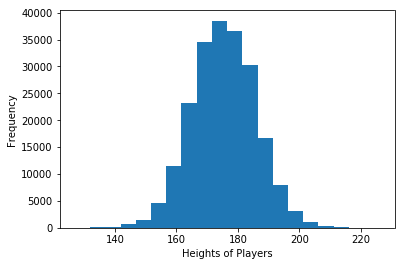

In [41]:
ax = df['Height'].plot.hist(bins=20)
ax.set_xlabel('Heights of Players')

# Other Useful Functions

* **drop()** - This function removes the column or row that you pass in (You also have the specify the axis). 
* **agg()** - The aggregate function lets you compute summary statistics about each group
* **apply()** - Lets you apply a specific function to any/all elements in a Dataframe or Series
* **get_dummies()** - Helpful for turning categorical data into one hot vectors.
* **drop_duplicates()** - Lets you remove identical rows

# Lots of Other Great Resources

Pandas has been around for a while and there are a lot of other good resources if you're still interested on getting the most out of this library. 
* http://pandas.pydata.org/pandas-docs/stable/10min.html
* https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
* http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
* https://www.dataquest.io/blog/pandas-python-tutorial/
* https://drive.google.com/file/d/0ByIrJAE4KMTtTUtiVExiUGVkRkE/view
* https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y